# Superposition and Entanglement in Qiskit
This notebook demonstrates:
1. **Superposition** using a single qubit.
2. **Entanglement** using two qubits.
We will use Qiskit to create circuits, visualize the states, and measure outcomes.

In [6]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet



In [7]:
# ===========================
# Import Libraries
# ===========================
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt


## 1. Superposition Example

Superposition Measurement Counts: {'1': 501, '0': 523}


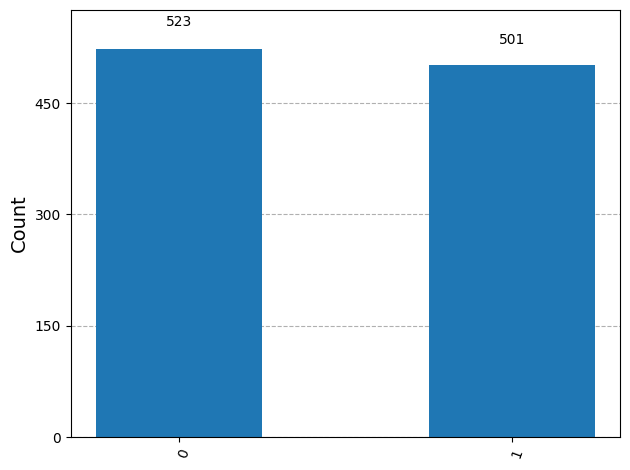

In [13]:
# ===========================
# Superposition Example
# ===========================
# Create 1-qubit circuit
qc_super = QuantumCircuit(1)

# Apply Hadamard gate to create superposition
qc_super.h(0)

# Draw the circuit
qc_super.draw('text')

# Get statevector
state_super = Statevector.from_instruction(qc_super)
plot_bloch_multivector(state_super)
plt.show()

# Measure and simulate
qc_super.measure_all()
simulator = AerSimulator()
job_super = simulator.run(qc_super, shots=1024)
result_super = job_super.result()
counts_super = result_super.get_counts()
print("Superposition Measurement Counts:", counts_super)
plot_histogram(counts_super)

## 2. Entanglement Example

Entangled Statevector: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
Entanglement Measurement Counts: {'11': 523, '00': 501}


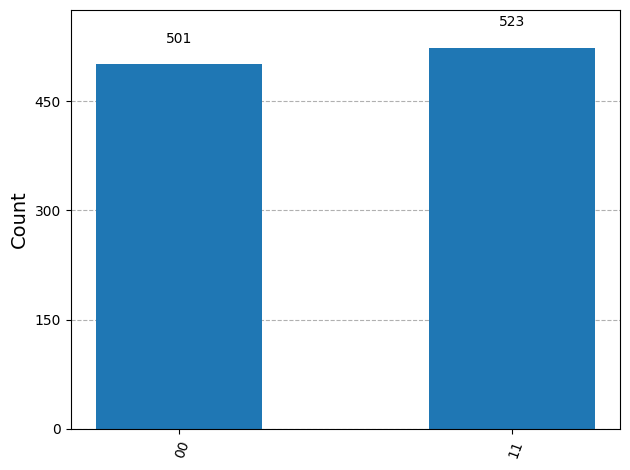

In [15]:
# ===========================
# Entanglement Example
# ===========================
# Create 2-qubit circuit
qc_ent = QuantumCircuit(2)

# Apply Hadamard on qubit 0
qc_ent.h(0)

# Apply CNOT to entangle qubit 0 and 1
qc_ent.cx(0, 1)

# Draw the circuit
qc_ent.draw('text')

# Get statevector
state_ent = Statevector.from_instruction(qc_ent)
print("Entangled Statevector:", state_ent)
plot_bloch_multivector(state_ent)
plt.show()

# Measure and simulate
qc_ent.measure_all()
job_ent = simulator.run(qc_ent, shots=1024)
result_ent = job_ent.result()
counts_ent = result_ent.get_counts()
print("Entanglement Measurement Counts:", counts_ent)
plot_histogram(counts_ent)